In [1]:
valid_file_loc = "../data/TinyStories/TinyStoriesV2-GPT4-valid.txt"
with open(valid_file_loc, encoding="utf-8") as f:
    valid_text = f.read()

valid_text_split = valid_text.split("<|endoftext|>")

In [3]:
from tokenizers import Tokenizer

tokenizer = Tokenizer.from_file("./TinyStories_tokenizer.json")

In [4]:
%%time

story_tokens_counts = []

for story in valid_text_split:
    story_tokens = tokenizer.encode(story).ids
    story_tokens_counts.append(len(story_tokens))

CPU times: user 8.09 s, sys: 0 ns, total: 8.09 s
Wall time: 8.25 s


In [11]:
%%time

story_tokens_counts = [len(tokenizer.encode(txt)) for txt in valid_text_split]
print(len(story_tokens_counts))

27631
CPU times: user 7.58 s, sys: 0 ns, total: 7.58 s
Wall time: 7.12 s


In [5]:
%%time

story_tokens_counts = []

story_tokens = tokenizer.encode_batch(valid_text_split)
[story_tokens_counts.append(len(s)) for s in story_tokens]
print(len(story_tokens_counts))

27631
CPU times: user 13.2 s, sys: 2.45 s, total: 15.7 s
Wall time: 1.9 s


In [6]:
%%time

story_tokens_counts = [len(tok) for tok in tokenizer.encode_batch(valid_text_split)]
print(len(story_tokens_counts))

27631
CPU times: user 13.6 s, sys: 2.37 s, total: 16 s
Wall time: 2.68 s


(array([1.000e+00, 0.000e+00, 6.000e+00, 1.570e+02, 1.841e+03, 6.579e+03,
        7.644e+03, 4.983e+03, 2.482e+03, 1.131e+03, 6.150e+02, 3.160e+02,
        2.620e+02, 2.530e+02, 2.510e+02, 2.080e+02, 1.620e+02, 1.470e+02,
        1.080e+02, 9.300e+01, 8.100e+01, 6.600e+01, 5.000e+01, 4.500e+01,
        3.400e+01, 2.400e+01, 2.300e+01, 9.000e+00, 1.100e+01, 1.000e+01,
        1.100e+01, 5.000e+00, 5.000e+00, 2.000e+00, 2.000e+00, 0.000e+00,
        3.000e+00, 2.000e+00, 1.000e+00, 8.000e+00]),
 array([   2. ,   28.2,   54.4,   80.6,  106.8,  133. ,  159.2,  185.4,
         211.6,  237.8,  264. ,  290.2,  316.4,  342.6,  368.8,  395. ,
         421.2,  447.4,  473.6,  499.8,  526. ,  552.2,  578.4,  604.6,
         630.8,  657. ,  683.2,  709.4,  735.6,  761.8,  788. ,  814.2,
         840.4,  866.6,  892.8,  919. ,  945.2,  971.4,  997.6, 1023.8,
        1050. ]),
 <BarContainer object of 40 artists>)

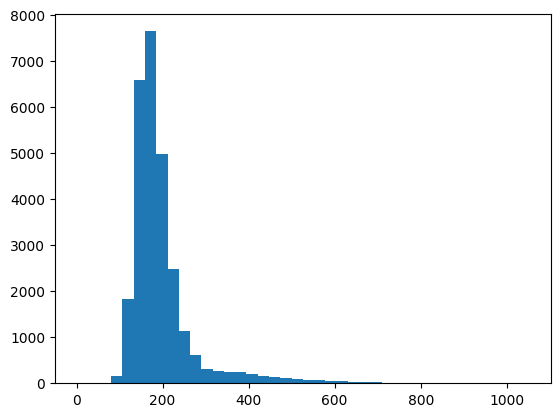

In [7]:
import matplotlib.pyplot as plt

plt.hist(story_tokens_counts, bins=40)

In [13]:
import numpy as np

count = np.sum(np.array(story_tokens_counts) < 128)
print("proportion of stories with less than 128 tokens: ", count / (len(story_tokens_counts)))

proportion of stories with less than 128 tokens:  0.04958199124172125


In [14]:
count = np.sum(np.array(story_tokens_counts) < 256)
print("proportion of stories with less than 256 tokens: ", count / (len(story_tokens_counts)))

proportion of stories with less than 256 tokens:  0.8892186312475119


In [15]:
count = np.sum(np.array(story_tokens_counts) < 512)
print("proportion of stories with less than 512 tokens: ", count / (len(story_tokens_counts)))

proportion of stories with less than 512 tokens:  0.9842206217654084


count how many time each token shows up, and plot a histogram